In [1]:
#!pip install corsikaio

In [2]:
import event
import lhaaso_sim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
import seaborn as sns
from corsikaio import CorsikaParticleFile
import time

### Input Data

In [3]:
# create file
dictID = { # name , charge, mass(GeV)
    1:["photon",0,0],
    2:["e+",1,0.000511],
    3:["e-",-1,0.000511],
    5:["mu+",1,0.105],
    6:["mu-",-1,0.105],
    13:["neutron",0,0.939],
    14:["proton",1,0.938]
}


in_dir = "test/in/"
out_dir = "test/out/" 

f=CorsikaParticleFile(in_dir+'10showers')

### Generating event dataframes

files and particle info dictionaries can be converted into particle data objects using the `file_to_events` function. exporting a dataframe is a default configuration

In [4]:
particle_events = lhaaso_sim.file_to_events(f,dictID)


Total particles: 82180
Total showers: 10


In [5]:
particle_events

,event,particle,energy,x,y,time
0,1,mu-,2.288468,-65.812775,-30.622147,23903.589844
1,1,mu+,3.126502,77.675232,-119.962082,23905.664062
2,1,photon,0.036546,-11.267500,101.680412,23903.898438
3,1,e-,0.019774,-79.166840,21.051594,23919.376953
4,1,photon,0.068046,-22.374645,41.694393,23895.443359
...,...,...,...,...,...,...
79926,10,e-,0.070461,-6.114704,-5.274181,92642.890625
79927,10,e-,0.020128,-1.242648,-6.090666,92645.265625
79928,10,photon,0.051479,-6.820193,-5.175234,92642.765625
79929,10,e+,0.850253,-6.820210,-5.180696,92642.765625


### Applying the LHAASO detectors mask

the function `lhaaso_evaluate_events` applies a detector mask to the particle data with the characteristics of LHAASO observatory. It would be the same process as using the `build_lhaaso` functuon to generate the detectors and iterating over the detectors using the function `èvalulate_events`.

In [6]:
t = time.time()
detected_events = lhaaso_sim.lhaaso_evaluate_events(particle_events)
print("total run time (s) : ",time.time() - t)  

DETECTOR GRID BUILT : em_scintillator_array 
 88 Detector lines 
 5324 Detectors 
 Energy threshold 0.003 GeV
 detects  ['photon']
DETECTOR GRID BUILT : muon_detector_array 
 44 Detector lines 
 1330 Detectors 
 Energy threshold 1.3 GeV
 detects  ['proton', 'neutron', 'mu+', 'mu-']
60325  particles within energy and type conditions
em_scintillator_array: 313 particles
1836  particles within energy and type conditions
muon_detector_array: 102 particles
total run time (s) :  17.97987413406372


The results are compiles in a final dataframe with the function `build_final_df`. the origin particle ID code is given as a parameter if needed.

In [7]:
final_df = lhaaso_sim.build_final_df(detected_events,14)
final_df

,shower,dt,dxy,E,em_scintillator_array,origin,muon_detector_array
0,1,378,17196,608,35,14,33
1,2,51,8075,10,35,14,1
2,3,67,18250,292,53,14,8
3,4,193,17821,269,81,14,26
4,5,853,34203,30,6,14,5
5,6,29,11538,78,24,14,3
6,7,32,14797,31,10,14,3
7,8,45,13311,211,43,14,8
8,9,29,21025,127,6,14,8
9,10,89,16466,1152,20,14,7


### Visualizing the detector array

In [8]:
# tihs build th detector arrays for LHAASO
scintillator_grid,muon_grid = lhaaso_sim.build_lhaaso()

DETECTOR GRID BUILT : em_scintillator_array 
 88 Detector lines 
 5324 Detectors 
 Energy threshold 0.003 GeV
 detects  ['photon']
DETECTOR GRID BUILT : muon_detector_array 
 44 Detector lines 
 1330 Detectors 
 Energy threshold 1.3 GeV
 detects  ['proton', 'neutron', 'mu+', 'mu-']


#### The grid sketch

Text(0, 0.5, 'y-coordinate [m]')

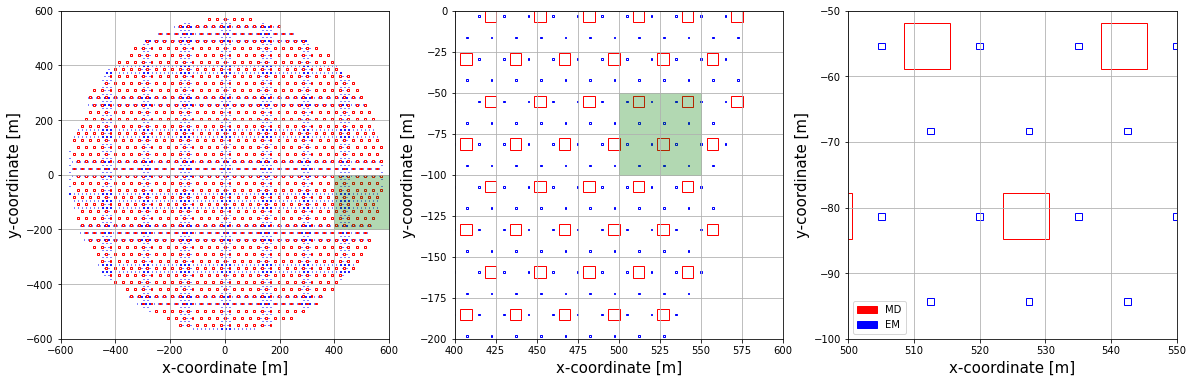

In [25]:


fig,ax = plt.subplots(figsize=(20,8))

# paint muon detector grid red and scintillator detector grid blue 

# whole LHAASO simulated area

#fontsize
fs = 15


plt.subplot(1,3,1)
scintillator_grid.plot_sketch("b")
muon_grid.plot_sketch("r")
plt.axis('scaled')
plt.grid()
plt.xlim(-600,600)
plt.ylim(-600,600)
rect = plt.Rectangle((400,-200),200,200,facecolor="green",edgecolor="green",alpha=0.3)
plt.gca().add_patch(rect)
plt.xlabel("x-coordinate [m]",fontsize=fs)
plt.ylabel("y-coordinate [m]",fontsize=fs)

# zoom 
plt.subplot(1,3,2)
scintillator_grid.plot_sketch("b")
muon_grid.plot_sketch("r")
plt.axis('scaled')
plt.xlim(400,600)
plt.ylim(-200,0)
plt.grid()
rect2 = plt.Rectangle((500,-100),50,50,facecolor="green",edgecolor="green",alpha=0.3)
plt.gca().add_patch(rect2)
plt.xlabel("x-coordinate [m]",fontsize=fs)
plt.ylabel("y-coordinate [m]",fontsize=fs)


# zoom 
plt.subplot(1,3,3)
scintillator_grid.plot_sketch("b")
muon_grid.plot_sketch("r")
plt.axis('scaled')
plt.xlim(500,550)
plt.ylim(-100,-50)
plt.grid()
red_patch = mpatches.Patch(color='red', label='MD')
blue_patch = mpatches.Patch(color='blue', label='EM')
plt.legend(handles=[red_patch,blue_patch])
plt.xlabel("x-coordinate [m]",fontsize=fs)
plt.ylabel("y-coordinate [m]",fontsize=fs)

after building each detector, the events can be processed separately.

In [10]:
events_sc = lhaaso_sim.evaluate_events([scintillator_grid],particle_events)
events_ph = lhaaso_sim.evaluate_events([muon_grid],particle_events)

60325  particles within energy and type conditions
em_scintillator_array: 313 particles
1836  particles within energy and type conditions
muon_detector_array: 102 particles


In [11]:
events_sc

,event,particle,energy,x,y,time,detector
0,1,photon,0.103338,-27.409426,-15.947536,23893.240234,em_scintillator_array
1,1,photon,0.057045,-49.793365,-315.456696,24011.390625,em_scintillator_array
2,1,photon,0.029949,-132.712189,-120.445915,23914.794922,em_scintillator_array
3,1,photon,0.126092,17.213482,-94.363846,23896.425781,em_scintillator_array
4,1,photon,0.016393,2.185527,-42.294346,23895.210938,em_scintillator_array
...,...,...,...,...,...,...,...
308,10,photon,0.046963,77.797447,61.267036,92649.281250,em_scintillator_array
309,10,photon,0.062063,-42.900379,-42.307964,92644.343750,em_scintillator_array
310,10,photon,0.050230,62.426022,9.296791,92647.289062,em_scintillator_array
311,10,photon,0.026710,-49.845627,204.426544,92688.101562,em_scintillator_array


In [12]:
detected_events

,event,particle,energy,x,y,time,detector
0,1,photon,0.103338,-27.409426,-15.947536,23893.240234,em_scintillator_array
1,1,photon,0.057045,-49.793365,-315.456696,24011.390625,em_scintillator_array
2,1,photon,0.029949,-132.712189,-120.445915,23914.794922,em_scintillator_array
3,1,photon,0.126092,17.213482,-94.363846,23896.425781,em_scintillator_array
4,1,photon,0.016393,2.185527,-42.294346,23895.210938,em_scintillator_array
...,...,...,...,...,...,...,...
410,10,mu+,1.482697,303.219849,-107.680702,92753.921875,muon_detector_array
411,10,mu+,1.774026,256.528534,76.023293,92715.031250,muon_detector_array
412,10,mu-,13.102063,63.530239,409.422729,92663.468750,muon_detector_array
413,10,mu+,9.561956,-99.993362,-78.222122,92649.117188,muon_detector_array
